# Huggingface library 튜토리얼

> 작성자      
```
* 김성현 (bananaband657@gmail.com)  
1기 멘토
김바다 (qkek983@gmail.com)
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
2기 멘토
박상희 (parksanghee0103@gmail.com)  
이정우 (jungwoo.l2.rs@gmail.com)
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
3, 4, 5기 멘토
이녕우 (leenw2@gmail.com)
박채훈 (qkrcogns2222@gmail.com)
```
[CC BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/2.0/kr/)

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.




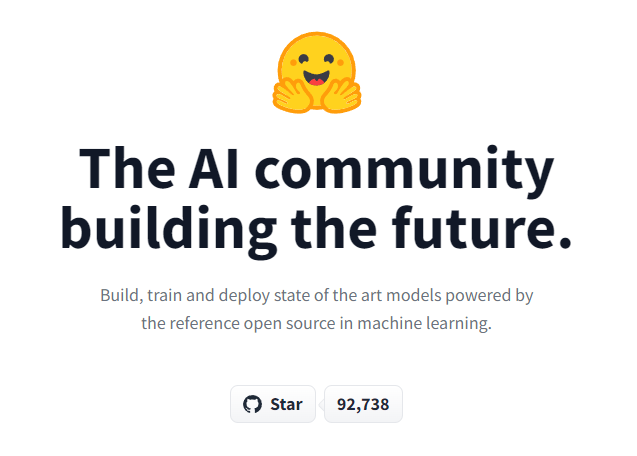

HuggingFace는 매우 인기있는 Transformers 라이브러리를 구축하고 유지하는 회사입니다.   
이 라이브러리를 통해 오늘날 사용 가능한 대부분의 크고 최첨단 transformer 모델을 사용하여 쉽게 시작할 수 있습니다.    
   
BERT, RoBERTa, GPT, GPT-2, XLNet 및 HuggingFace의 자체 DistilBERT 및 DistilGPT-2를 포함하여 (이에 국한되지 않음) 모델을 다운로드하고 작업을 시작하기 위해 3 줄 이상이 필요하지 않습니다.



```
from transformers import TFAutoModel, AutoTokenizer
model = TFAutoModel.from_pretrained("<model-name>")
tokenizer = AutoTokenizer.from_pretrained("<model-name>")
```



모델의 검색 역시 매우 간단합니다.   
검색 창에 사용하고 싶으신 모델만 입력하면 결과를 바로 확인할 수 있습니다.   

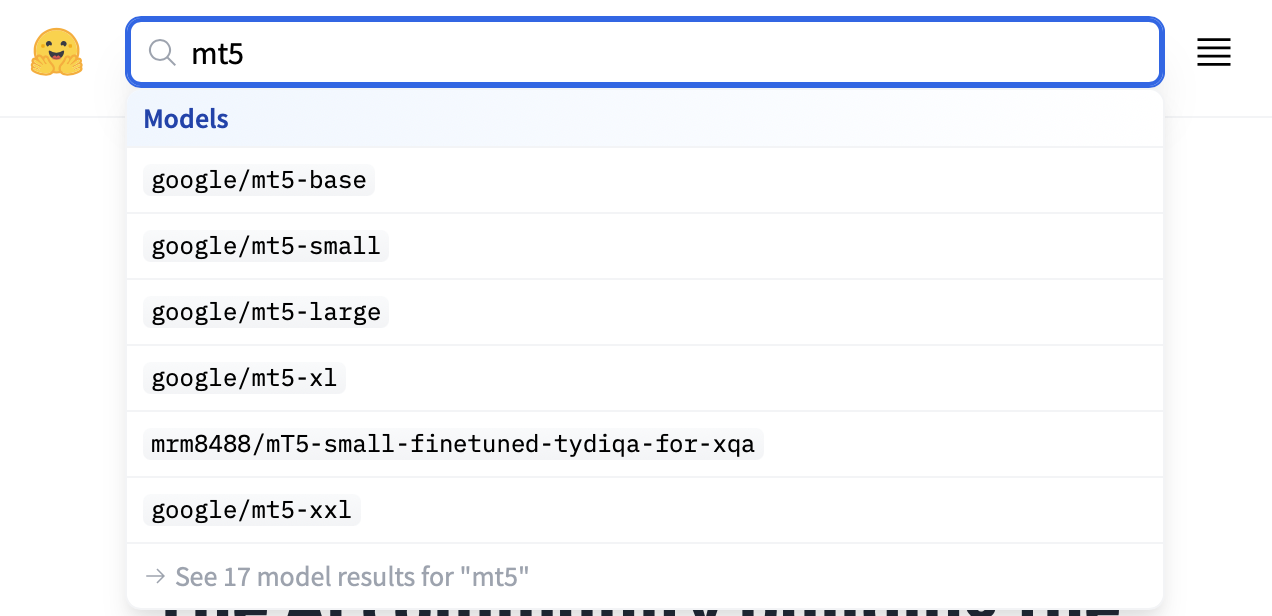

## Tokenizer 실습

먼저 transformers를 설치하겠습니다.    
transformers만 설치해줘도 해당 transformers의 버젼에 맞는 tokenizers가 자동으로 설치됩니다.   

In [1]:
# !pip install transformers

# Tokenizer의 응용

In [2]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer

Transformer 기반의 대표 모델인 multi-lingual bert model을 사용해보도록 하겠습니다.

In [3]:
# Store the model we want to use
MODEL_NAME = "bert-base-multilingual-cased"

# We need to create the model and tokenizer
model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
print(tokenizer.vocab_size)

119547


In [5]:
for i, key in enumerate(tokenizer.get_vocab()):
    print(key)
    if i > 50:
        break

391
螂
بانک
Bayerische
районлау
комітету
Ấn
szó
##ատիվ
##fassung
Teatru
##泪
韃
##lessa
##iniai
Exeter
788
planetang
derrota
##reur
##cyjnym
totalt
##ьи
##举
Eugene
##ченко
Arie
دان
##제가
marcha
##ocha
Amtszeit
Want
##iologie
1399
vision
##ੀਆ
叡
##starší
istiqomat
蟾
podobne
Poza
1987
##psa
Ridley
Austrian
##驸
匹
##unan
Uganda
##dão


In [6]:
text = "이순신은 조선 중기의 무신이다."

Multi-lingual bert model은 [BertTokenizerFast](https://huggingface.co/transformers/model_doc/bert.html#berttokenizerfast) class로 되어있습니다.

In [7]:
print(type(tokenizer))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [8]:
tokenized_input_text = tokenizer(text, return_tensors="pt")
for key, value in tokenized_input_text.items():
    print("{}:\n\t{}".format(key, value))

input_ids:
	tensor([[   101,   9638, 119064,  25387,  10892,  59906,   9694,  46874,   9294,
          25387,  11925,    119,    102]])
token_type_ids:
	tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
	tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [10]:
print(tokenized_input_text['input_ids'])    # input text를 tokenizing한 후 vocab의 id
print(tokenized_input_text.input_ids)
print(tokenized_input_text['token_type_ids'])   # segment id (sentA or sentB)
print(tokenized_input_text.token_type_ids)
print(tokenized_input_text['attention_mask'])   # special token (pad, cls, sep) or not
print(tokenized_input_text.attention_mask)

tensor([[   101,   9638, 119064,  25387,  10892,  59906,   9694,  46874,   9294,
          25387,  11925,    119,    102]])
tensor([[   101,   9638, 119064,  25387,  10892,  59906,   9694,  46874,   9294,
          25387,  11925,    119,    102]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [11]:
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)
input_ids = tokenizer.encode(text) # encoding에서는 cls(101), sep(102)가 문장 맨 앞과 뒤에 붙는 것을 확인할 수 있음
print(input_ids)
decoded_ids = tokenizer.decode(input_ids) # decoding에서 [CLS], [SEP] 토큰 확인 가능
print(decoded_ids)

['이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.']
[101, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 102]
[CLS] 이순신은 조선 중기의 무신이다. [SEP]


In [14]:
tokenized_text = tokenizer.tokenize(text, add_special_tokens=False) # 그냥 tokenize에서는 special token이 보이지 않음
print(tokenized_text)
input_ids = tokenizer.encode(text, add_special_tokens=False) # encoding 에서는 cls(101), sep(102)가 없어진 것을 확인
print(input_ids)
decoded_ids = tokenizer.decode(input_ids) # 마찬가지로 decoding에서도 [CLS], [SEP]이 없어진 것 확인
print(decoded_ids)

['이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.']
[9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119]
이순신은 조선 중기의 무신이다.


In [15]:
tokenized_text = tokenizer.tokenize(
    text,
    add_special_tokens=False,
    max_length=5,
    truncation=True
    )
print(tokenized_text)

input_ids = tokenizer.encode(
    text,
    add_special_tokens=False,
    max_length=5,
    truncation=True # truncation을 true로 둬야 뒤에가 잘림
    )
print(input_ids)
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids) # max_length는 토큰 기준이기 때문에 입력 문장 길이와 전혀 무관함

['이', '##순', '##신', '##은', '조선']
[9638, 119064, 25387, 10892, 59906]
이순신은 조선


In [16]:
print(tokenizer.pad_token)
print(tokenizer.pad_token_id)

tokenized_text = tokenizer.tokenize(
    text,
    add_special_tokens=False,
    max_length=20,
    padding="max_length"
    )
print(tokenized_text)

input_ids = tokenizer.encode(
    text,
    add_special_tokens=False,
    max_length=20,
    padding="max_length" # 문장의 앞, 뒤, 두 문장의 사이 등 다양한 방식으로 padding 가능(max_length는 문장 맨 뒤 - 가장 평범한 방식)
    )
print(input_ids)

decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)

[PAD]
0
['이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
[9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 0, 0, 0, 0, 0, 0, 0, 0, 0]
이순신은 조선 중기의 무신이다. [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


이번엔 새로운 token을 추가해보도록 하겠습니다.

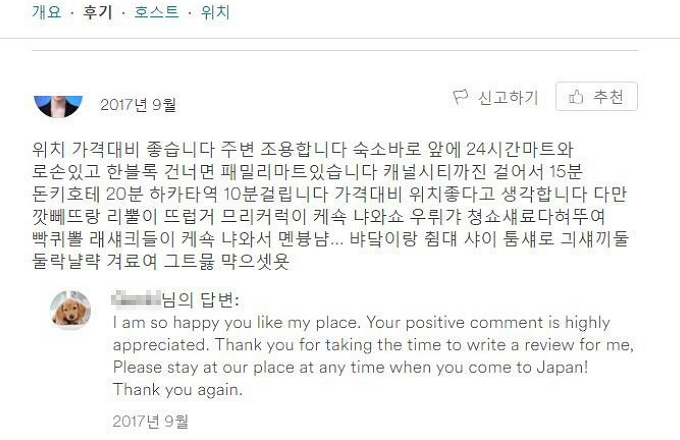

In [17]:
print(tokenizer.vocab_size)

119547


In [18]:
text = "깟뻬뜨랑 리뿔이 뜨럽거 므리커럭이 케쇽 냐왜쇼 우뤼갸 쳥쇼섀료다혀뚜여"

tokenized_text = tokenizer.tokenize(text, add_special_tokens=False)
print(tokenized_text)
input_ids = tokenizer.encode(text, add_special_tokens=False)
print(input_ids)
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)

['[UNK]', '리', '##뿔', '##이', '뜨', '##럽', '##거', '므', '##리', '##커', '##럭', '##이', '[UNK]', '냐', '##왜', '##쇼', '[UNK]', '[UNK]']
[100, 9238, 119021, 10739, 9151, 118867, 41521, 9308, 12692, 106826, 118864, 10739, 100, 9002, 119164, 119060, 100, 100]
[UNK] 리뿔이 뜨럽거 므리커럭이 [UNK] 냐왜쇼 [UNK] [UNK]


In [19]:
# [UNK] 토큰으로 처리되던 단어들을 추가하기
# 하등 에어비앤비 리뷰 뿐 아니라, 전문 분야 논문 등 필요한 vocab이 추가 필요한 경우들이 있음
added_token_num = tokenizer.add_tokens(["깟뻬뜨랑", "케쇽", "우뤼갸", "쳥쇼", "섀료"])
print(added_token_num)

tokenized_text = tokenizer.tokenize(text, add_special_tokens=False)
print(tokenized_text)
input_ids = tokenizer.encode(text, add_special_tokens=False)
print(input_ids)
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)

5
['깟뻬뜨랑', '리', '##뿔', '##이', '뜨', '##럽', '##거', '므', '##리', '##커', '##럭', '##이', '케쇽', '냐', '##왜', '##쇼', '우뤼갸', '쳥쇼', '섀료', '다', '##혀', '##뚜', '##여']
[119547, 9238, 119021, 10739, 9151, 118867, 41521, 9308, 12692, 106826, 118864, 10739, 119548, 9002, 119164, 119060, 119549, 119550, 119551, 9056, 80579, 118841, 29935]
깟뻬뜨랑 리뿔이 뜨럽거 므리커럭이 케쇽 냐왜쇼 우뤼갸 쳥쇼 섀료 다혀뚜여


In [20]:
print(tokenizer.vocab_size)

119547


특정 역할을 위한 special token도 추가할 수 있습니다.

In [21]:
text = "[SHKIM]이순신은 조선 중기의 무신이다.[/SHKIM]"
# [ENTITY]이순신[/ENTITY]를 명시해줘야 하는데, [ENTITY]나 [/ENTITY]를 하나의 토큰으로 인식하지 못함
tokenized_text = tokenizer.tokenize(text, add_special_tokens=False) # [SHKIM] 토큰이 vocab 단위로 나뉘어져 토큰화되는 것 확인
print(tokenized_text)
input_ids = tokenizer.encode(text, add_special_tokens=False)
print(input_ids)
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)

['[', 'SH', '##KI', '##M', ']', '이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.', '[', '/', 'SH', '##KI', '##M', ']']
[164, 38702, 59879, 11517, 166, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 164, 120, 38702, 59879, 11517, 166]
[ SHKIM ] 이순신은 조선 중기의 무신이다. [ / SHKIM ]


In [ ]:
text = "[SHKIM]이순신은 조선 중기의 무신이다.[/SHKIM]"
# [SHKIM]과 [/SHKIM]을 additional_special_tokens를 이용하여 등록
added_token_num += tokenizer.add_special_tokens({"additional_special_tokens":["[SHKIM]", "[/SHKIM]"]})
tokenized_text = tokenizer.tokenize(text, add_special_tokens=False) # [SHKIM]이 하나의 토큰으로 인식되는 것 확인
print(tokenized_text)
input_ids = tokenizer.encode(text, add_special_tokens=False) # [SHKIM]이 119552 하나로 인코딩 되는 것 확인
print(input_ids)
decoded_ids = tokenizer.decode(input_ids) # 그대로 [SHKIM] 토큰이 디코딩 되는 것 확인
print(decoded_ids)
decoded_ids = tokenizer.decode(input_ids,skip_special_tokens=True) # skip_special_tokens로 [SHKIM] 토큰 스킵되는 것 확인
print(decoded_ids)

['[SHKIM]', '이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.', '[/SHKIM]']
[119552, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 119553]
[SHKIM] 이순신은 조선 중기의 무신이다. [/SHKIM]
이순신은 조선 중기의 무신이다.


In [ ]:
print(added_token_num) # 추가된 토큰 개수: ["깟뻬뜨랑", "케쇽", "우뤼갸", "쳥쇼", "섀료", [SHKIM], [/SHKIM]]

7


자연어처리 task에 따라 아래와 같이 사용할 수도 있습니다 :-)

In [22]:
# Single segment input
single_seg_input = tokenizer("이순신은 조선 중기의 무신이다.")

# Multiple segment input
multi_seg_input = tokenizer("이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다.")

print("Single segment token (str): {}".format(tokenizer.convert_ids_to_tokens(single_seg_input['input_ids'])))
print("Single segment token (int): {}".format(single_seg_input['input_ids']))
print("Single segment type       : {}".format(single_seg_input['token_type_ids']))

# Segments are concatened in the input to the model, with 
print()
print("Multi segment token (str): {}".format(tokenizer.convert_ids_to_tokens(multi_seg_input['input_ids'])))
print("Multi segment token (int): {}".format(multi_seg_input['input_ids'])) # [SEP] 토큰 알아서 문장 사이에 삽입된 것 확인
print("Multi segment type       : {}".format(multi_seg_input['token_type_ids'])) # 알아서 segment 분류

Single segment token (str): ['[CLS]', '이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.', '[SEP]']
Single segment token (int): [101, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 102]
Single segment type       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Multi segment token (str): ['[CLS]', '이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.', '[SEP]', '그는', '임', '##진', '##왜', '##란', '##을', '승', '##리로', '이', '##끌', '##었다', '.', '[SEP]']
Multi segment token (int): [101, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 102, 17889, 9644, 18623, 119164, 49919, 10622, 9484, 100434, 9638, 118705, 17706, 119, 102]
Multi segment type       : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


배열로 입력하면 출력 결과도 배열로 저장돼요!

In [23]:
# Padding highlight
tokens = tokenizer(
    ["이순신은 조선 중기의 무신이다.", "그는 임진왜란을 승리로 이끌었다."], # 배열을 입력하면 각각의 문장으로 tokenizing되어 배열로 출력됨
    padding=True  # First sentence will have some PADDED tokens to match second sequence length
)

for i in range(2):
    print("Tokens (int)      : {}".format(tokens['input_ids'][i]))
    print("Tokens (str)      : {}".format([tokenizer.convert_ids_to_tokens(s) for s in tokens['input_ids'][i]]))
    print("Tokens (attn_mask): {}".format(tokens['attention_mask'][i]))
    print()

Tokens (int)      : [101, 9638, 119064, 25387, 10892, 59906, 9694, 46874, 9294, 25387, 11925, 119, 102, 0]
Tokens (str)      : ['[CLS]', '이', '##순', '##신', '##은', '조선', '중', '##기의', '무', '##신', '##이다', '.', '[SEP]', '[PAD]']
Tokens (attn_mask): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

Tokens (int)      : [101, 17889, 9644, 18623, 119164, 49919, 10622, 9484, 100434, 9638, 118705, 17706, 119, 102]
Tokens (str)      : ['[CLS]', '그는', '임', '##진', '##왜', '##란', '##을', '승', '##리로', '이', '##끌', '##었다', '.', '[SEP]']
Tokens (attn_mask): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]



## BERT 모델 테스트

BERT 모델을 이용해 [MASK] 토큰을 예측할 수도 있어요 :-)

In [24]:
text = "이순신은 [MASK] 중기의 무신이다."
tokenized_text = tokenizer.tokenize(text)

print(tokenized_text)

['이', '##순', '##신', '##은', '[MASK]', '중', '##기의', '무', '##신', '##이다', '.']


In [25]:
from transformers import pipeline

nlp_fill = pipeline('fill-mask', model=MODEL_NAME) # pipeline("fill-mask", model) 사용시 [MASK] 토큰 바로 예측 가능
nlp_fill("이순신은 [MASK] 중기의 무신이다.") # "조선"이 가장 높은 score의 [MASK] 예측값으로 도출

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.8747125267982483,
  'token': 59906,
  'token_str': '조선',
  'sequence': '이순신은 조선 중기의 무신이다.'},
 {'score': 0.06436437368392944,
  'token': 9751,
  'token_str': '청',
  'sequence': '이순신은 청 중기의 무신이다.'},
 {'score': 0.010954917408525944,
  'token': 9665,
  'token_str': '전',
  'sequence': '이순신은 전 중기의 무신이다.'},
 {'score': 0.004647171590477228,
  'token': 22200,
  'token_str': '##종',
  'sequence': '이순신은종 중기의 무신이다.'},
 {'score': 0.003610657062381506,
  'token': 12310,
  'token_str': '##기',
  'sequence': '이순신은기 중기의 무신이다.'}]

모델의 출력 결과도 획득할 수 있습니다.

In [26]:
tokens_pt = tokenizer("이순신은 조선 중기의 무신이다.", return_tensors="pt")
for key, value in tokens_pt.items():
    print("{}:\n\t{}".format(key, value))

outputs = model(**tokens_pt)
last_hidden_state = outputs.last_hidden_state
pooler_output = outputs.pooler_output

print("\nToken wise output: {}, Pooled output: {}".format(last_hidden_state.shape, pooler_output.shape))

input_ids:
	tensor([[   101,   9638, 119064,  25387,  10892,  59906,   9694,  46874,   9294,
          25387,  11925,    119,    102]])
token_type_ids:
	tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
	tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

Token wise output: torch.Size([1, 13, 768]), Pooled output: torch.Size([1, 768])


In [ ]:
print(pooler_output) # [CLS] token to 768 dimension

tensor([[ 2.3151e-01, -8.0099e-02, -1.4249e-01, -1.6500e-01,  4.0655e-02,
         -1.0855e-01, -8.1335e-02,  1.8238e-01, -2.5709e-01,  1.7708e-01,
          5.5793e-02,  2.1646e-01, -2.6028e-01, -1.1805e-01,  1.6878e-01,
          2.2665e-01,  1.6693e-01, -1.4605e-01, -3.3806e-01, -2.5401e-04,
         -9.9437e-01, -3.0201e-01,  7.8168e-02, -2.0071e-01, -2.2053e-02,
          1.8374e-01,  7.8908e-02,  2.7492e-01,  1.5742e-01, -1.8703e-03,
         -1.9677e-01, -9.9644e-01,  5.8323e-01,  2.5800e-01,  1.8723e-01,
         -2.3858e-01,  5.7414e-02,  2.9294e-01,  2.0999e-01, -3.3407e-01,
          9.6668e-02, -1.3142e-01,  1.4946e-01, -2.3270e-01, -1.2149e-01,
         -2.6757e-01, -5.3486e-03,  3.1485e-01, -3.2587e-01, -8.8365e-02,
          2.4172e-01,  1.7982e-01,  3.3085e-01, -2.0571e-01, -2.7982e-02,
          2.8920e-01, -1.2191e-01, -3.7320e-01,  4.6051e-02, -2.3296e-01,
         -2.3272e-01, -4.9195e-02,  9.7081e-02, -8.8512e-02, -5.6786e-02,
         -2.2798e-01,  2.4579e-02, -1.

만약에 vocab을 새롭게 추가했다면, 반드시 model의 embedding layer 사이즈를 늘려주세요!

In [27]:
print(model.get_input_embeddings())
model.resize_token_embeddings(tokenizer.vocab_size + added_token_num) # 여기서 added_token_num 사용!
print(model.get_input_embeddings())

Embedding(119547, 768, padding_idx=0)
Embedding(119552, 768)


[CLS] 토큰을 활용해 문장의 유사도를 측정할 수 있습니다.

In [28]:
sent1 = tokenizer("오늘 하루 어떻게 보냈나요?", return_tensors="pt")
sent2 = tokenizer("오늘은 어떤 하루를 보내셨나요?", return_tensors="pt")
sent3 = tokenizer("이순신은 조선 중기의 무신이다.", return_tensors="pt")
sent4 = tokenizer("깟뻬뜨랑 리뿔이 뜨럽거 므리커럭이 케쇽 냐왜쇼 우뤼갸 쳥쇼섀료다혀뚜여", return_tensors="pt")


outputs = model(**sent1)
sent_1_pooler_output = outputs.pooler_output

outputs = model(**sent2)
sent_2_pooler_output = outputs.pooler_output

outputs = model(**sent3)
sent_3_pooler_output = outputs.pooler_output

outputs = model(**sent4)
sent_4_pooler_output = outputs.pooler_output

In [29]:
from torch import nn

cos = nn.CosineSimilarity(dim=1, eps=1e-6)
print(cos(sent_1_pooler_output, sent_2_pooler_output))
print(cos(sent_2_pooler_output, sent_3_pooler_output))
print(cos(sent_3_pooler_output, sent_4_pooler_output))
# 1번과 4번은 의문스럽게도 높은 유사도를 보임 -> 코사인 유사도가 만능 평가책은 아님
print(cos(sent_1_pooler_output, sent_4_pooler_output))

tensor([0.9757], grad_fn=<SumBackward1>)
tensor([0.6075], grad_fn=<SumBackward1>)
tensor([0.6099], grad_fn=<SumBackward1>)
tensor([0.9261], grad_fn=<SumBackward1>)
